This notebooks looks at a survey sent out to various college ultimate frisbee teams throughout the country, with the goal of seeing how the Berry College ultimate frisbee team stacks up to other college ultimate frisbee teams in terms of financial support and liability requirements. 

In [63]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Making the data into a dataFrame
collegeUltimateDF = pd.read_csv("college_ultimate.csv")

WHO?
- What regions are represented?
- What states are represented?
- How many mens vs. womens teams?
- How many D1 vs D3 teams?
- How many teams have made Nationals at least once since 2010?

Distribution of regions

In [65]:
def getRegionCount():

    regionAmtDict = {}

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            # if the region is not in the dictionary
            if row[4] not in regionAmtDict:
                regionAmtDict[row[4]] = 1
            # if the region is already in the dicionary, increment its value
            else:
                regionAmtDict[row[4]] += 1
        return regionAmtDict 

regionDF = pd.DataFrame.from_dict(getRegionCount(), orient = "index", columns=["Teams"])
regionDF

,Teams
Southeast,20
Ohio Valley,1
North Central,1
Mid-Atlantic,1
Southwest,1
Metro East,1


Distribution of states

In [66]:
def getStateCount():

    stateAmtDict = {}

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            # if the region is not in the dictionary
            if row[2] not in stateAmtDict:
                stateAmtDict[row[2]] = 1
            # if the region is already in the dicionary, increment its value
            else:
                stateAmtDict[row[2]] += 1
        return stateAmtDict 

sortedDict = sorted(getStateCount().items(), key = lambda x:x[1], reverse=True)
sortedDict

[('Georgia', 6),
 ('Tennessee', 6),
 ('Florida', 3),
 ('Alabama', 3),
 ('Ohio', 1),
 ('Michigan', 1),
 ('Mississippi', 1),
 ('North Carolina', 1),
 ('California', 1),
 ('Louisiana', 1),
 ('New York', 1)]

Number of mens teams versus womens teams surveyed.

In [67]:
def getGenderDivisionCount():

    genderAmtDict = {}

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            if row[5] not in genderAmtDict:
                genderAmtDict[row[5]] = 1
            else:
                genderAmtDict[row[5]] += 1
        return genderAmtDict 
    
genderDF = pd.DataFrame.from_dict(getGenderDivisionCount(), orient = "index", columns=["Teams"])
genderDF

,Teams
Men,18
Women,7


Number of D1 teams versus D3 teams surveyed

In [68]:
def getCompDivisionCount():

    compAmtDict = {}

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            if row[6] not in compAmtDict:
                compAmtDict[row[6]] = 1
            else:
                compAmtDict[row[6]] += 1
        return compAmtDict 

divisionDF = pd.DataFrame.from_dict(getCompDivisionCount(), orient = "index", columns=["Teams"])
divisionDF

,Teams
1,14
3,11


Number of nationals appearances since 2010 distribution

In [69]:
def getNationalsCount():

    nationalsAmtDict = {}

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            if row[8] not in nationalsAmtDict:
                nationalsAmtDict[row[8]] = 1
            else:
                nationalsAmtDict[row[8]] += 1
        return nationalsAmtDict

nationalsDF = pd.DataFrame.from_dict(getNationalsCount(), orient = "index", columns=["Teams"])
nationalsDF


,Teams
0,14
3,1
6,2
2,2
1,2
7,1
4,3


WHAT? 

How does Berry compare to other schools in chaperone and liability requirements?

- What percentage of schools require a fac/staff chaperone for tournaments? Is Berry one of those schools?

8


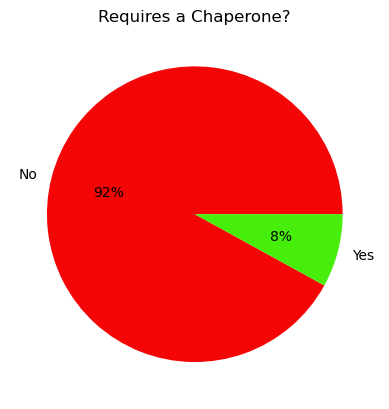

In [70]:
def getchaperonePercentage(chaperone, csvFileName):
    totalCount = 0
    chaperoneCount = 0

    with open(csvFileName) as csvFile:
        # make another var that holds the open file
        openCSV = csv.reader(csvFile, delimiter=',')

        print(openCSV)

        # how to skip the header row
        next(openCSV)

        # loop through my dataset and print every row
        for row in openCSV:

            totalCount += 1
            if chaperone in row[7]:
                chaperoneCount+= 1

    return round(chaperoneCount/totalCount * 100)

print(getchaperonePercentage("Yes", "college_ultimate.csv"))

chapGroup = collegeUltimateDF.groupby("Fac/Staff_Chaperone")
plt.pie(x=chapGroup.size(), 
            labels = chapGroup.size().index, 
            autopct = '%1.0f%%', 
            colors=[ "#f50606", "#48ee0b"])
plt.title('Requires a Chaperone?')

plt.show()



In [71]:
def getChaperoneDict():
    chapDict = {}

    with open("college_ultimate.csv") as chapFile:
        openCSV = csv.reader(chapFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            chaperoneList = row[7].split(',')
            if "Yes" in chaperoneList:
                teamName = row[3]
                schoolName = row[1]
                genderDivision = row[5]
                chaperone = row[7]

                chapDict[teamName] = {"School" : schoolName, "Mens or Womens" : genderDivision, "Chaperone?" : chaperone}
    return chapDict

sortedDict = sorted(getChaperoneDict().items(), key=lambda item: item[1]["Chaperone?"], reverse=True)
sortedDict

[('Bucks',
  {'School': 'Berry College', 'Mens or Womens': 'Men', 'Chaperone?': 'Yes'}),
 ('Valkyries',
  {'School': 'Berry College', 'Mens or Womens': 'Women', 'Chaperone?': 'Yes'})]

 - What percentage of schools require a liability form? A travel roster? How does Berry fit into that?

52


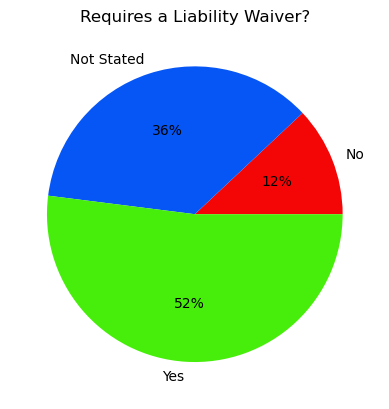

In [72]:
def getliabilityPercentage(liability, csvFileName):
    totalCount = 0
    liabilityCount = 0

    with open(csvFileName) as csvFile:
        # make another var that holds the open file
        openCSV = csv.reader(csvFile, delimiter=',')

        print(openCSV)

        # how to skip the header row
        next(openCSV)

        # loop through my dataset and print every row
        for row in openCSV:

            totalCount += 1
            if liability in row[12]:
                liabilityCount+= 1

    return round(liabilityCount/totalCount * 100)

print(getliabilityPercentage("Yes", "college_ultimate.csv"))
liabGroup = collegeUltimateDF.groupby("Liability_Waiver")
plt.pie(x=liabGroup.size(), 
            labels = liabGroup.size().index, 
            autopct = '%1.0f%%', 
            colors=[ "#f50606",  "#0656f5",  "#48ee0b",])
plt.title('Requires a Liability Waiver?')

plt.show()
                

In [73]:
def getLiabilityDict():
    liabilityDict = {}

    with open("college_ultimate.csv") as chapFile:
        openCSV = csv.reader(chapFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            collegeList = row[1].split(',')
            if "Berry College" in collegeList:
                teamName = row[3]
                schoolName = row[1]
                genderDivision = row[5]
                liability = row[12]

                liabilityDict[teamName] = {"School" : schoolName, "Mens or Womens" : genderDivision, "Liability Waiver?" : liability}
        return liabilityDict
    
sortedDict = sorted(getLiabilityDict().items(), key=lambda item: item[1]["Liability Waiver?"], reverse=True)
sortedDict

[('Bucks',
  {'School': 'Berry College',
   'Mens or Womens': 'Men',
   'Liability Waiver?': 'Yes'}),
 ('Valkyries',
  {'School': 'Berry College',
   'Mens or Womens': 'Women',
   'Liability Waiver?': 'Yes'})]

56


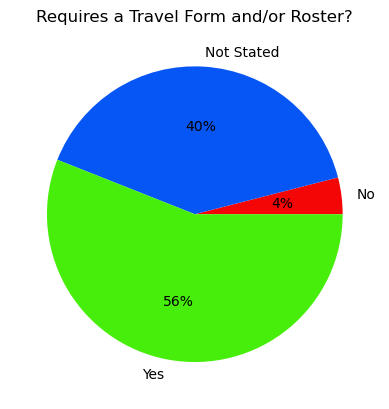

In [74]:
def getTravelPercentage(travel, csvFileName):
    totalCount = 0
    travelCount = 0

    with open(csvFileName) as csvFile:
        # make another var that holds the open file
        openCSV = csv.reader(csvFile, delimiter=',')

        print(openCSV)

        # how to skip the header row
        next(openCSV)

        # loop through my dataset and print every row
        for row in openCSV:

            totalCount += 1
            if travel in row[13]:
                travelCount+= 1

    return round(travelCount/totalCount * 100)

print(getTravelPercentage("Yes", "college_ultimate.csv"))

travGroup = collegeUltimateDF.groupby("Travel_Form")
plt.pie(x=travGroup.size(), 
            labels = travGroup.size().index, 
            autopct = '%1.0f%%', 
            colors=[ "#f50606",  "#0656f5",  "#48ee0b",])
plt.title('Requires a Travel Form and/or Roster?')

plt.show()



In [75]:
def getTravelDict():
    travelDict = {}

    with open("college_ultimate.csv") as chapFile:
        openCSV = csv.reader(chapFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            collegeList = row[1].split(',')
            if "Berry College" in collegeList:
                teamName = row[3]
                schoolName = row[1]
                genderDivision = row[5]
                travel = row[13]

                travelDict[teamName] = {"School" : schoolName, "Mens or Womens" : genderDivision, "Travel Form(s)?" : travel}
        return travelDict
    
sortedDict = sorted(getTravelDict().items(), key=lambda item: item[1]["Travel Form(s)?"], reverse=True)
sortedDict

[('Bucks',
  {'School': 'Berry College',
   'Mens or Womens': 'Men',
   'Travel Form(s)?': 'Yes'}),
 ('Valkyries',
  {'School': 'Berry College',
   'Mens or Womens': 'Women',
   'Travel Form(s)?': 'Yes'})]

How does Berry compare to other schools in terms of financial support?

 - What is the distribution of team's funding received? Where does Berry fit in?

{'$0-2499': 40.0, '$2500-4999': 36.0, '$5000-7499': 4.0, '$7500-9999': 12.0, '$10000+': 8.0}


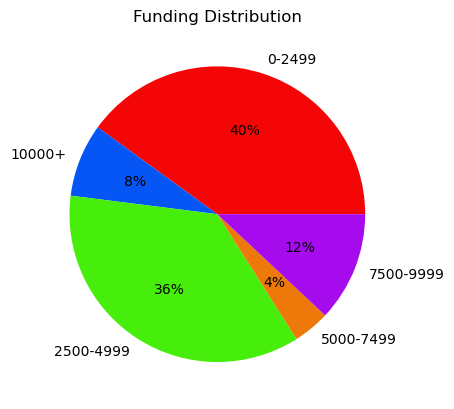

In [98]:
def getFundingBreakdown(csvFileName):
    totalCount = 0
    t0Count = 0
    t2500Count = 0 
    t5000Count = 0
    t7500Count = 0
    t10000Count = 0

    with open(csvFileName) as csvFile:
        openCSV = csv.reader(csvFile, delimiter=',')
        print(openCSV)
        next(openCSV)
        for row in openCSV:
            fundingList = row[9].split(',')

            for fund in fundingList:
                totalCount += 1
                if "0-2499" in fund:
                    t0Count += 1
                if "2500-4999" in fund:
                    t2500Count += 1
                if "5000-7499" in fund:
                    t5000Count += 1
                if "7500-9999" in fund:
                    t7500Count += 1
                if "10000+" in fund:
                    t10000Count += 1
        return {"$0-2499" : (t0Count/totalCount) * 100, "$2500-4999" : (t2500Count/totalCount) * 100, "$5000-7499" : (t5000Count/totalCount) * 100, "$7500-9999" : (t7500Count/totalCount) * 100, "$10000+" : (t10000Count/totalCount) * 100}

print(getFundingBreakdown("college_ultimate.csv"))

fundingGroup = collegeUltimateDF.groupby("Funding_Semester($)")
plt.pie(x=fundingGroup.size(), 
            labels = fundingGroup.size().index, 
            autopct = '%1.0f%%', 
            colors=[ "#f50606",  "#0656f5",  "#48ee0b", "#ee790b", "#a60bee"])
plt.title('Funding Distribution')

plt.show()

In [99]:
def getFundingDict(csvFileName):
    fundingDict = {}

    with open("college_ultimate.csv") as chapFile:
        openCSV = csv.reader(chapFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            collegeList = row[1].split(',')
            if "Berry College" in collegeList:
                teamName = row[3]
                schoolName = row[1]
                genderDivision = row[5]
                funding = row[9]

                fundingDict[teamName] = {"School" : schoolName, "Mens or Womens" : genderDivision, "Funding($)" : funding}
        return fundingDict
    
getFundingDict("college_ultimate.csv")

{'Bucks': {'School': 'Berry College',
  'Mens or Womens': 'Men',
  'Funding($)': '2500-4999'},
 'Valkyries': {'School': 'Berry College',
  'Mens or Womens': 'Women',
  'Funding($)': '2500-4999'}}

 - What is the average amount of funding that covers expenses? Where does Berry fit in, above or below average?

In [77]:
def getAverageFundingthatCoversExpenses(csvFileName):
    sum = 0
    totalSchools = 0
    with open(csvFileName) as csvFile:
        openCSV = csv.reader(csvFile, delimiter=',')
        next(openCSV)
        for row in openCSV:
            fundingList = row[10].split(',')
            totalSchools += 1

            for fund in fundingList:
                sum += int(fund)
    return sum / totalSchools

print(getAverageFundingthatCoversExpenses("college_ultimate.csv"))

def getFundingPercentDict(csvFileName):
    fundingPercentDict = {}

    with open("college_ultimate.csv") as chapFile:
        openCSV = csv.reader(chapFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            collegeList = row[1].split(',')
            if "Berry College" in collegeList:
                teamName = row[3]
                schoolName = row[1]
                genderDivision = row[5]
                fundingPercent = row[10]

                fundingPercentDict[teamName] = {"School" : schoolName, "Mens or Womens" : genderDivision, "Funding that Covers Expenses(%)" : fundingPercent}
        return fundingPercentDict
    
getFundingPercentDict("college_ultimate.csv")

52.0


{'Bucks': {'School': 'Berry College',
  'Mens or Womens': 'Men',
  'Funding that Covers Expenses(%)': '40'},
 'Valkyries': {'School': 'Berry College',
  'Mens or Womens': 'Women',
  'Funding that Covers Expenses(%)': '60'}}

WHEN? 
- When do teams handle liability? Before the tournament? After the tournament? Both? When does Berry?

{'Before a Tourney': 72.0, 'Before and After a Tourney': 8.0, 'Not Stated': 20.0}


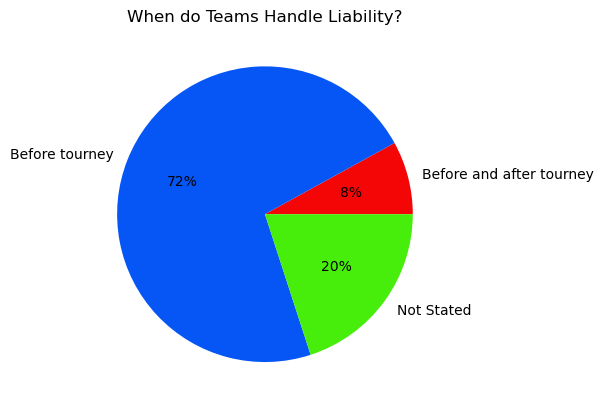

In [102]:
def getLiabilityHandlingBreakdown(csvFileName):
    beforeCount = 0
    beforeAndAfterCount = 0
    notStatedCount = 0 
    totalCount = 0

    with open(csvFileName) as csvFile:
        openCSV = csv.reader(csvFile, delimiter=',')
        print(openCSV)
        next(openCSV)
        for row in openCSV:
            liabilityHandlingList = row[14].split(',')

            for handle in liabilityHandlingList:
                totalCount += 1
                if "Before tourney" in handle:
                    beforeCount += 1
                if "Before and after tourney" in handle:
                    beforeAndAfterCount += 1
                if "Not Stated" in handle:
                    notStatedCount += 1
        return {"Before a Tourney" : (beforeCount/totalCount) * 100, "Before and After a Tourney" : (beforeAndAfterCount/totalCount) * 100, "Not Stated" : (notStatedCount/totalCount) * 100}

print(getLiabilityHandlingBreakdown("college_ultimate.csv"))

liabHandleGroup = collegeUltimateDF.groupby("When_Handle_Liability")
plt.pie(x=liabHandleGroup.size(), 
            labels = liabHandleGroup.size().index, 
            autopct = '%1.0f%%', 
            colors=[ "#f50606",  "#0656f5",  "#48ee0b",])
plt.title('When do Teams Handle Liability?')

plt.show()



In [101]:
def getLiabilityHandlingDict(csvFileName):
    liabilityHandlingDict = {}

    with open("college_ultimate.csv") as chapFile:
        openCSV = csv.reader(chapFile, delimiter=',')

        next(openCSV)

        for row in openCSV:
            collegeList = row[1].split(',')
            if "Berry College" in collegeList:
                teamName = row[3]
                schoolName = row[1]
                genderDivision = row[5]
                liabHandle = row[14]

                liabilityHandlingDict[teamName] = {"School" : schoolName, "Mens or Womens" : genderDivision, "When is Liability Handled?" : liabHandle}
        return liabilityHandlingDict
    
getLiabilityHandlingDict("college_ultimate.csv")

{'Bucks': {'School': 'Berry College',
  'Mens or Womens': 'Men',
  'When is Liability Handled?': 'Before tourney'},
 'Valkyries': {'School': 'Berry College',
  'Mens or Womens': 'Women',
  'When is Liability Handled?': 'Before tourney'}}

WHERE?
- What is the state-by-state breakdown of funding?  

Used this link to get the filtering I wanted: https://chatgpt.com/s/t_6978253446788191b782c34db2e1315e 

In [79]:
def getStateFunding():
    stateFunding = {}

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')
        next(openCSV)

        for row in openCSV:
            state = row[2]
            fundingList = row[9].split(',')

            if state not in stateFunding:
                stateFunding[state] = {
                    "$0-2499": 0,
                    "$2500-4999": 0,
                    "$5000-7499": 0,
                    "$7500-9999": 0,
                    "$10000+": 0
                }

            for fund in fundingList:
                if "0-2499" in fund:
                    stateFunding[state]["$0-2499"] += 1
                if "2500-4999" in fund:
                    stateFunding[state]["$2500-4999"] += 1
                if "5000-7499" in fund:
                    stateFunding[state]["$5000-7499"] += 1
                if "7500-9999" in fund:
                    stateFunding[state]["$7500-9999"] += 1
                if "10000+" in fund:
                    stateFunding[state]["$10000+"] += 1

    return stateFunding

stateDF = pd.DataFrame.from_dict(getStateFunding(), orient = "index")
stateDF = stateDF.sort_values(by='$0-2499', ascending=False)
stateDF
                

,$0-2499,$2500-4999,$5000-7499,$7500-9999,$10000+
Alabama,3,0,0,0,0
Florida,2,0,0,1,0
Georgia,2,4,0,0,0
Mississippi,1,0,0,0,0
Tennessee,1,3,0,0,2
California,1,0,0,0,0
Ohio,0,0,0,1,0
Michigan,0,0,1,0,0
North Carolina,0,0,0,1,0
Louisiana,0,1,0,0,0


What is the regional breakdown of funding (Southeast vs non-Southeast)?

In [80]:
def getRegionalFunding():
    regionalFunding = {}
    regionalFunding["Southeast"] = {
                    "$0-2499": 0,
                    "$2500-4999": 0,
                    "$5000-7499": 0,
                    "$7500-9999": 0,
                    "$10000+": 0
                }
    regionalFunding["Non-Southeast"] = {
                    "$0-2499": 0,
                    "$2500-4999": 0,
                    "$5000-7499": 0,
                    "$7500-9999": 0,
                    "$10000+": 0
                }

    with open("college_ultimate.csv") as carFile:
        openCSV = csv.reader(carFile, delimiter=',')
        next(openCSV)

        

        for row in openCSV:
            region = row[4]
            # fundingList = row[9].split(',')
            fund = row[9]
            


            if region == "Southeast":
                if "0-2499" in fund:
                    regionalFunding[region]["$0-2499"] += 1
                if "2500-4999" in fund:
                    regionalFunding[region]["$2500-4999"] += 1
                if "5000-7499" in fund:
                    regionalFunding[region]["$5000-7499"] += 1
                if "7500-9999" in fund:
                    regionalFunding[region]["$7500-9999"] += 1
                if "10000+" in fund:
                    regionalFunding[region]["$10000+"] += 1
            else:
                if "0-2499" in fund:
                    regionalFunding["Non-Southeast"]["$0-2499"] += 1
                if "2500-4999" in fund:
                    regionalFunding["Non-Southeast"]["$2500-4999"] += 1
                if "5000-7499" in fund:
                    regionalFunding["Non-Southeast"]["$5000-7499"] += 1
                if "7500-9999" in fund:
                    regionalFunding["Non-Southeast"]["$7500-9999"] += 1
                if "10000+" in fund:
                    regionalFunding["Non-Southeast"]["$10000+"] += 1

    return regionalFunding

sortedDict = sorted(getRegionalFunding().items(), key=lambda item: item[1]["$0-2499"], reverse=True)
regionalDF = pd.DataFrame.from_dict(getRegionalFunding(), orient = "index")
regionalDF

,$0-2499,$2500-4999,$5000-7499,$7500-9999,$10000+
Southeast,9,8,0,1,2
Non-Southeast,1,1,1,2,0


Where is funding the highest and the lowest?

- Even though not many teams outside of the southeast were surveyed, the majority of funding to those teams outside of the southeast was at least $5,000 per semester. The southeast meanwhile, had 17 of its 20 teams surveyed having funding less than $5,000 per semester. 

- Of the states with more than one team surveyed (Georgia, Tennessee, Florida, and Alabama), Tennesse had by far the highest funding, with two teams receiving at least $10,000 per semester of the 6 teams in Tennessee. Florida had a school receive between $5,000 and $7,499, but teams in both Alabama and Georgia don't come close, all receiving less than $5,000 each semester with every school in Alabama receiving less tha $2,500 each semester. 

WHY?

"The What"

- Why do teams get the funding they do? (Nationals appearances, competition division, gender?)
- Why do teams have the liability requirements they do? (Nationals appearances, competition division, gender?)

- Used https://chatgpt.com/s/t_697922b4dbe08191a4d59317537b32fe to get the tallied data frame.

"The Where"

- Why do certain regions have more/less funding? (Nationals appearances)

In [81]:
rawDF = pd.read_csv("college_ultimate.csv")

Look at distribution of funding for teams that have been to Nationals at least once since 2010 versus teams that haven't.

In [82]:
nationalsDF = rawDF.loc[rawDF["Nationals_Apperances_Since_2010"]>=1]

fundingTallies = (
    nationalsDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)
fundingTallies.columns = ["Funding per Semester", "Teams"]
fundingTallies



,Funding per Semester,Teams
0,2500-4999,5
1,7500-9999,2
2,0-2499,2
3,5000-7499,1
4,10000+,1


In [110]:
print(9/11)

0.8181818181818182


In [83]:
nonNationalsDF = rawDF.loc[rawDF["Nationals_Apperances_Since_2010"]==0]

fundingTallies = (
    nonNationalsDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)
fundingTallies.columns = ["Funding per Semester($)", "Teams"]
fundingTallies

,Funding per Semester($),Teams
0,0-2499,8
1,2500-4999,4
2,7500-9999,1
3,10000+,1


In [109]:
print(6/14)

0.42857142857142855


Look at distribution of funding for D1 teams versus D3 teams

In [84]:
division1DF = rawDF.loc[rawDF["Competition_Division"]==1]

fundingTallies = (
    division1DF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)
fundingTallies.columns = ["Funding per Semester", "Teams"]
fundingTallies

,Funding per Semester,Teams
0,0-2499,8
1,2500-4999,5
2,7500-9999,1


In [111]:
print(6/14)

0.42857142857142855


In [85]:
division3DF = rawDF.loc[rawDF["Competition_Division"]==3]

fundingTallies = (
    division3DF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)
fundingTallies.columns = ["Funding per Semester", "Teams"]
fundingTallies

,Funding per Semester,Teams
0,2500-4999,4
1,7500-9999,2
2,0-2499,2
3,10000+,2
4,5000-7499,1


In [112]:
print(9/11)

0.8181818181818182


Look at funding distribution for mens teams versus womens teams

In [86]:
mensDF = rawDF.loc[rawDF["Gender_Division"]=="Men"]

fundingTallies = (
    mensDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)
fundingTallies.columns = ["Funding per Semester", "Teams"]
fundingTallies

,Funding per Semester,Teams
0,0-2499,8
1,2500-4999,5
2,7500-9999,3
3,5000-7499,1
4,10000+,1


In [87]:
womensDF = rawDF.loc[rawDF["Gender_Division"]=="Women"]

fundingTallies = (
    womensDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)
fundingTallies.columns = ["Funding per Semester", "Teams"]
fundingTallies

,Funding per Semester,Teams
0,2500-4999,4
1,0-2499,2
2,10000+,1


Look at liability waiver and travel form requirements for teams that have been to Nationals at least once since 2010 versus teams that haven't.

- https://chatgpt.com/s/t_69792b2c4cd88191a352ffb34dd91799 to learn I could do the crosstab feature

In [88]:
liabilityTallies = pd.crosstab(
    nationalsDF["Liability_Waiver"],
    nationalsDF["Travel_Form"]
)

liabilityTallies

Travel_Form,No,Not Stated,Yes
Liability_Waiver,,,
No,1,0,1
Not Stated,0,3,1
Yes,0,1,4


In [89]:
liabilityTallies = pd.crosstab(
    nonNationalsDF["Liability_Waiver"],
    nonNationalsDF["Travel_Form"]
)
liabilityTallies

Travel_Form,Not Stated,Yes
Liability_Waiver,,
No,0,1
Not Stated,3,2
Yes,3,5


Liability and travel form requirements for D1 versus D3 teams

In [90]:
liabilityTallies = pd.crosstab(
    division1DF["Liability_Waiver"],
    division1DF["Travel_Form"]
)
liabilityTallies

Travel_Form,Not Stated,Yes
Liability_Waiver,,
No,0,2
Not Stated,1,3
Yes,3,5


In [107]:
print(13/14)

0.9285714285714286


In [91]:
liabilityTallies = pd.crosstab(
    division3DF["Liability_Waiver"],
    division3DF["Travel_Form"]
)
liabilityTallies

Travel_Form,No,Not Stated,Yes
Liability_Waiver,,,
No,1,0,0
Not Stated,0,5,0
Yes,0,1,4


In [108]:
print(5/11)

0.45454545454545453


Liability and travel form requirements for mens versus womens teams

In [104]:
liabilityTallies = pd.crosstab(
    mensDF["Liability_Waiver"],
    mensDF["Travel_Form"]
)
liabilityTallies


Travel_Form,No,Not Stated,Yes
Liability_Waiver,,,
No,1,0,2
Not Stated,0,3,2
Yes,0,3,7


In [105]:
print(14/18)

0.7777777777777778


In [93]:
liabilityTallies = pd.crosstab(
    womensDF["Liability_Waiver"],
    womensDF["Travel_Form"]
)
liabilityTallies

Travel_Form,Not Stated,Yes
Liability_Waiver,,
Not Stated,3,1
Yes,1,2


In [106]:
print(4/7)

0.5714285714285714


Funding distribution for southeast teams versus non-southeast teams and their relationship with being nationals level or not.

- https://chatgpt.com/s/t_697a88fe46448191bd1acec1e62a2d34 used to get the structure for how to do these layered distributions

In [94]:
seNationalsDF = nationalsDF.loc[nationalsDF['Competition_Region']=='Southeast']
seFundingDist = (
    seNationalsDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)

seFundingDist.columns = ["Funding per Semester", "Number of Teams"]
seFundingDist


,Funding per Semester,Number of Teams
0,2500-4999,4
1,0-2499,1
2,10000+,1


In [95]:
seNonNationalsDF = nonNationalsDF.loc[nonNationalsDF['Competition_Region']=='Southeast']
seFundingDist = (
    seNonNationalsDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)

seFundingDist.columns = ["Funding per Semester", "Number of Teams"]
seFundingDist

,Funding per Semester,Number of Teams
0,0-2499,8
1,2500-4999,4
2,7500-9999,1
3,10000+,1


In [96]:
nonSENationalsDF = nationalsDF.loc[nationalsDF['Competition_Region']!='Southeast']
nonSEFundingDist = (
    nonSENationalsDF["Funding_Semester($)"]
    .value_counts()
    .reset_index()
)

nonSEFundingDist.columns = ["Funding per Semester", "Number of Teams"]
nonSEFundingDist

,Funding per Semester,Number of Teams
0,7500-9999,2
1,5000-7499,1
2,0-2499,1
3,2500-4999,1


There were no teams surveyed not from the Southeast that haven't made Nationals at least once since 2010.